# Classification Of Chart Images by Type using VGG-16 Model

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import time
import random
import keras
import tensorflow as tf
from keras.applications.vgg16 import VGG16
#from keras.applications import vgg16 as VGG16
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

## Data Loading and Training

### Training on Unbalanced Subset

In [42]:
#Training Data
#dot_plot=(0,26009)
#horizontal_bar_chart=(26010,78709)
#line_chart=(78710,104606)
#vertical_bar_chart=(104607,157069)

#Randomly selecting subset for training  
subset_image_list=[]
for i in range (0,825):
  subset_image_list.append(random.randint(0,26009))

for i in range (0,1675):
  subset_image_list.append(random.randint(26010,78709))

for i in range (0,825):
  subset_image_list.append(random.randint(78710,104606))

for i in range (0,1675):
  subset_image_list.append(random.randint(104607,157069))

for i in range(0, len(subset_image_list)):
  subset_image_list[i]=str(subset_image_list[i])+'.png'

data_path = 'C:/Users/romil/Desktop/MCM Practicum/Data/Train/png'
data_dir_list = os.listdir(data_path)

img_data_list=[]
for img in subset_image_list:
	img_path = data_path + '/'+ img
	img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
	x = tf.keras.preprocessing.image.img_to_array(img)
	x = np.expand_dims(x, axis=0)
	x = preprocess_input(x)
	img_data_list.append(x)

#Preprocessing image array
img_data = np.array(img_data_list)
img_data=np.rollaxis(img_data,1,0)
img_data=img_data[0]

#Defining the number of classes
num_classes = 4
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

#Defining the class ranges
labels[0:824]=0
labels[825:2499]=1
labels[2500:3324]=2
labels[3325:5000]=3
names = ['dot_plot','horizontal_bar_chart','line_chart','vertical_bar_chart']

Y = np_utils.to_categorical(labels, num_classes)

x,y = shuffle(img_data,Y, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

image_input = Input(shape=(224, 224, 3))

model = VGG16(input_tensor=image_input, include_top=True, weights='imagenet')
model.summary()
last_layer = model.get_layer('fc2').output
out = Dense(num_classes, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)

for layer in custom_vgg_model.layers[:-1]:
	layer.trainable = False

custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

#Training
hist = custom_vgg_model.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
(loss, accuracy) = custom_vgg_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### Training on Balanced Subset

In [ ]:
#Training Data
#dot_plot=(0,26009)
#horizontal_bar_chart=(26010,78709)
#line_chart=(78710,104606)
#vertical_bar_chart=(104607,157069)

#Randomly selecting subset for training  
subset_image_list=[]
for i in range (0,1250):
  subset_image_list.append(random.randint(0,26009))

for i in range (0,1250):
  subset_image_list.append(random.randint(26010,78709))

for i in range (0,1250):
  subset_image_list.append(random.randint(78710,104606))

for i in range (0,1250):
  subset_image_list.append(random.randint(104607,157069))

for i in range(0, len(subset_image_list)):
  subset_image_list[i]=str(subset_image_list[i])+'.png'

data_path = 'C:/Users/romil/Desktop/MCM Practicum/Data/Train/png'
data_dir_list = os.listdir(data_path)

img_data_list=[]
for img in subset_image_list:
	img_path = data_path + '/'+ img
	img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
	x = tf.keras.preprocessing.image.img_to_array(img)
	x = np.expand_dims(x, axis=0)
	x = preprocess_input(x)
	img_data_list.append(x)

#Preprocessing image array
img_data = np.array(img_data_list)
img_data=np.rollaxis(img_data,1,0)
img_data=img_data[0]

#Defining the number of classes
num_classes = 4
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

#Defining the class ranges
labels[0:824]=0
labels[825:2499]=1
labels[2500:3324]=2
labels[3325:5000]=3
names = ['dot_plot','horizontal_bar_chart','line_chart','vertical_bar_chart']

Y = np_utils.to_categorical(labels, num_classes)

x,y = shuffle(img_data,Y, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

image_input = Input(shape=(224, 224, 3))

model = VGG16(input_tensor=image_input, include_top=True, weights='imagenet')
model.summary()
last_layer = model.get_layer('fc2').output
out = Dense(num_classes, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)

for layer in custom_vgg_model.layers[:-1]:
	layer.trainable = False

custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

#Training
hist = custom_vgg_model.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
(loss, accuracy) = custom_vgg_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

## Testing

In [31]:
#Testing Data
#dot_plot=(0,5573)
#horizontal_bar_chart=(5574,16865)
#line_chart=(16866,22414)
#vertical_bar_chart=(22415,33656)

#Generating randomly selected balanced testing subset

j=0
testing_array=np.zeros((1000,4), dtype="<U100")

for i in range (0,250):
    testing_array[j][0]=(random.randint(0,5573))
    testing_array[j][1]='dot_plot'
    j=j+1

for i in range (0,250):
    testing_array[j][0]=(random.randint(5574,16865))
    testing_array[j][1]='horizontal_bar_chart'
    j=j+1

for i in range (0,250):
    testing_array[j][0]=(random.randint(16866,22414))
    testing_array[j][1]='line_chart'
    j=j+1

for i in range (0,250):
    testing_array[j][0]=(random.randint(22415,33656))
    testing_array[j][1]='vertical_bar_chart'
    j=j+1

test1=['heatmap.png','Heatmap','','']
test2=['pie_chart.png','Pie Chart','','']
test3=['spatial_map.png','Spatial Chart','','']
testing_array=np.vstack([testing_array,test1])
testing_array=np.vstack([testing_array,test2])
testing_array=np.vstack([testing_array,test3])
print(testing_array)

[['3203' 'dot_plot' '' '']
 ['71' 'dot_plot' '' '']
 ['4138' 'dot_plot' '' '']
 ...
 ['heatmap.png' 'Heatmap' '' '']
 ['pie_chart.png' 'Pie Chart' '' '']
 ['spatial_map.png' 'Spatial Chart' '' '']]


In [43]:
#Parsing images in testing dataset one at a time

for i in range(len(testing_array)):
    image_index=(testing_array[i][0])
    if (image_index=='heatmap.png' or image_index=='pie_chart.png' or image_index=='spatial_map.png'):
        image_path='C:/Users/romil/Desktop/MCM Practicum/Data/'+(image_index)
    else:
        img_path='C:/Users/romil/Desktop/MCM Practicum/Data/Test/png/'+(image_index)+'.png'
    img=tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    x=tf.keras.preprocessing.image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    x=preprocess_input(x)
    prediction = custom_vgg_model.predict(x)
    #testing_array[i][2]=
    max_prob=(np.max(prediction[0]))
    testing_array[i][2]=max_prob
    for j in range(len(prediction[0])):
        if max_prob==prediction[0][j]:
            if j==0:
                testing_array[i][3]=('dot_plot')
            elif j==1:
                testing_array[i][3]=('horizontal_bar_chart')
            elif j==2:
                testing_array[i][3]=('line_chart')
            elif j==3:
                testing_array[i][3]=('vertical_bar_chart')
#Exporting array to CSV
pd.DataFrame(testing_array).to_csv('VGG_testing_output.csv')

1/1 [==============================] - 0s 135ms/step
[['3203' 'dot_plot' '1.0' 'dot_plot']
 ['71' 'dot_plot' '0.99999297' 'dot_plot']
 ['4138' 'dot_plot' '1.0' 'dot_plot']
 ...
 ['heatmap.png' 'Heatmap' '1.0' 'vertical_bar_chart']
 ['pie_chart.png' 'Pie Chart' '1.0' 'vertical_bar_chart']
 ['spatial_map.png' 'Spatial Chart' '1.0' 'vertical_bar_chart']]


## Evaluation

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


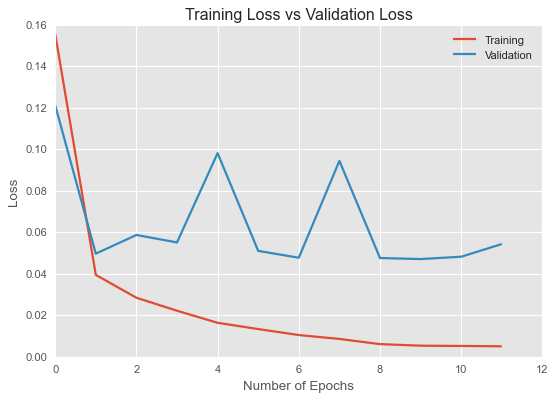

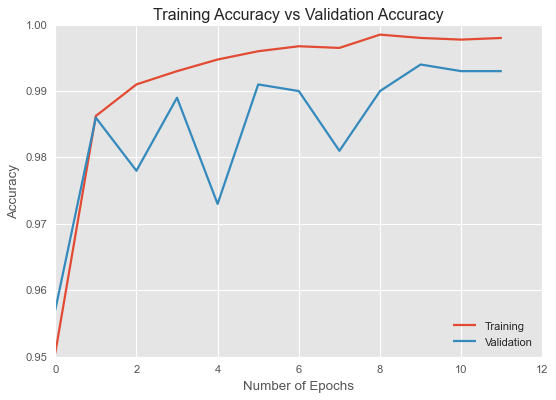

In [45]:
#Visualizing losses and accuracy

import matplotlib.pyplot as plt
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(12)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend(['Training','Validation'])
plt.style.use(['ggplot'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.legend(['Training','Validation'],loc=4)
plt.style.use(['ggplot'])